In [10]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import torchvision
import torch
import random
import torch.nn as nn
import litdata

postprocess = (
    torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)), 
        #torchvision.transforms.ToTensor(),
        #torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]),
    nn.Identity(),
    )

train_dataset = litdata.LITDataset(
            "IN1k",
            r"F:\data",
            override_extensions=[
                'jpg',
                'cls'
            ],
            train = True,
        ).map_tuple(*postprocess)

# Load CIFAR-10 dataset
#train_dataset = torchvision.datasets.CIFAR10(root='F:\data', train=True, download=False, transform=torchvision.transforms.Resize((224, 224)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Select a random image from the data loader
random_index = 3#random.randint(0, len(train_dataset) - 1)
image, _ = train_dataset[random_index]

# Convert the image to a floating point data type
image = img_as_float(image)
plt.imshow(image)
plt.axis("off")
plt.show()

# Loop over the number of segments
for numSegments in (10, 20, 30):
    # Apply SLIC and extract (approximately) the supplied number of segments
    segments = slic(image, n_segments=numSegments, sigma=1)

    # Show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("off")

# Show the plots
plt.show()

AssertionError: (224, 224, 3)

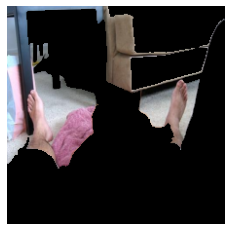

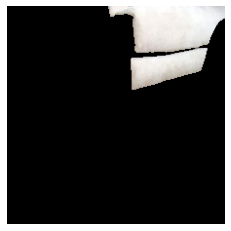

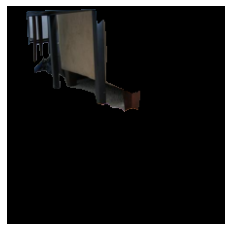

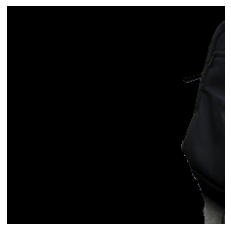

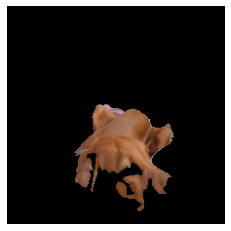

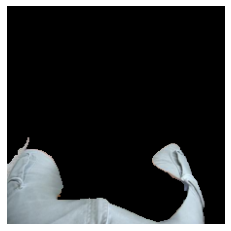

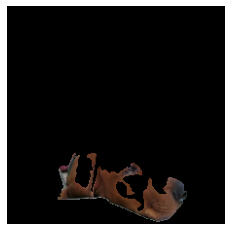

In [12]:
import numpy as np 

# Loop over the number of segments
# for numSegments in (10, 20, 30):
#     # Apply SLIC and extract (approximately) the supplied number of segments
segments = slic(image, n_segments=10, sigma=1)


# Iterate over unique segment labels
for segment_label in np.unique(segments):
    segment_mask = segments == segment_label
    segmented_image = np.copy(image)
    segmented_image[~segment_mask] = 0  # Set pixels outside segment to black
    
    # Display the segmented image
    fig = plt.figure("Segment %d" % (segment_label))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(segmented_image)
    plt.axis("off")
    plt.show()